# CESM2, ERA5 wind speed comparison

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import sys
import cmocean
sys.path.append('/home/users/birgal/')
time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)

from nemo_python_git.utils import rotate_vector
# %load_ext line_profiler

In [2]:
base_dir  = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
era5_dir  = f'{base_dir}ERA5-forcing/climatology/'
cesm2_dir = f'{base_dir}climate-forcing/CESM2/LE2/ensemble_mean/'

mesh_mask = xr.open_dataset(f'{base_dir}bathymetry/mesh_mask-20250715.nc').squeeze().isel(nav_lev=0)
domcfg    = xr.open_dataset(f'{base_dir}bathymetry/domain_cfg-20250715.nc').squeeze()
distcoast = xr.open_dataset(f'{base_dir}bathymetry/distance_coast-20250715.nc')

# ERA5_angle   = xr.open_dataset(f'{era5_dir}ERA5_eANT025_wind_angle_3-hourly_1979-2024_mean_monthly.nc').where(mesh_mask.tmask!=0)
# ERA5_speed   = xr.open_dataset(f'{era5_dir}ERA5_eANT025_wind_speed_3-hourly_1979-2024_mean_monthly.nc').where(mesh_mask.tmask!=0)
# CESM2_angle  = xr.open_dataset(f'{cesm2_dir}CESM2-LE2_eANT025_wind_angle_3-hourly_ensemble_1979-2024_mean_monthly.nc').where(mesh_mask.tmask!=0)
# CESM2_speed  = xr.open_dataset(f'{cesm2_dir}CESM2-LE2_eANT025_wind_speed_3-hourly_ensemble_1979-2024_mean_monthly.nc').where(mesh_mask.tmask!=0)
# CESM2_speed_corr = xr.open_dataset(f'{cesm2_dir}bias_corr/CESM2-LE2_wind_speed_3-hourly_bias_corr_monthly.nc').where(mesh_mask.tmask!=0)

In [10]:
cesm_dir = f'{base_dir}climate-forcing/CESM2/LE2/processed_highres/ens1011.001/'
cesm2_uo = xr.open_dataset(f'{cesm_dir}../../processed/ens1011.001/CESM2-LE2_ens1011.001_3-hourly_UBOT_y1900.nc')
cesm2_vo = xr.open_dataset(f'{cesm_dir}../../processed/ens1011.001/CESM2-LE2_ens1011.001_3-hourly_VBOT_y1900.nc')
cesm2_ui = xr.open_dataset(f'{cesm_dir}CESM2-LE2_ens1011.001_eANT025_3-hourly_UBOT_y1980m01.nc')
cesm2_vi = xr.open_dataset(f'{cesm_dir}CESM2-LE2_ens1011.001_eANT025_3-hourly_VBOT_y1980m01.nc')

In [12]:
cesm2_uo

<xarray.Dataset> Size: 1GB
Dimensions:  (lat: 192, lon: 288, time: 2920)
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... -5.0 -3.75 -2.5 -1.25
  * time     (time) datetime64[ns] 23kB 1900-01-01 ... 1900-12-31T21:00:00
Data variables:
    UBOT     (time, lat, lon) float64 1GB ...

In [39]:
cesm2_uxy1, cesm2_vxy1, cos_grid, sin_grid = rotate_vector(cesm2_ui.UBOT, cesm2_vi.VBOT, domcfg, gtype='T', periodic=True, halo=False, return_angles=True, reverse=False)

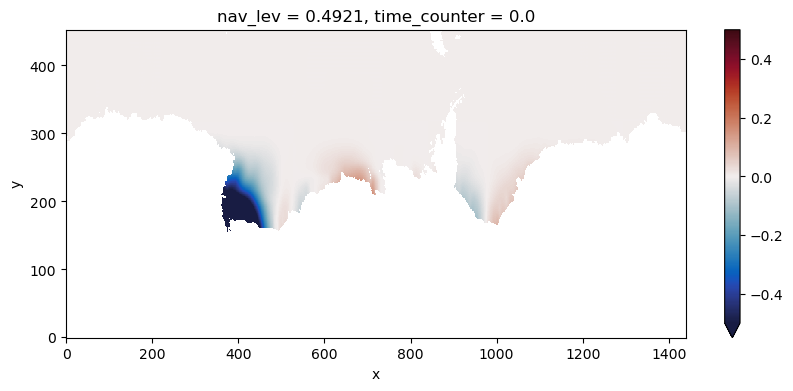

In [42]:
(cesm2_uxy.mean(dim='time_counter').where(mesh_mask.tmask!=0) - cesm2_uxy1.mean(dim='time_counter').where(mesh_mask.tmask!=0)).plot(figsize=(10,4), vmin=-0.5, vmax=0.5, cmap=cmocean.cm.balance)

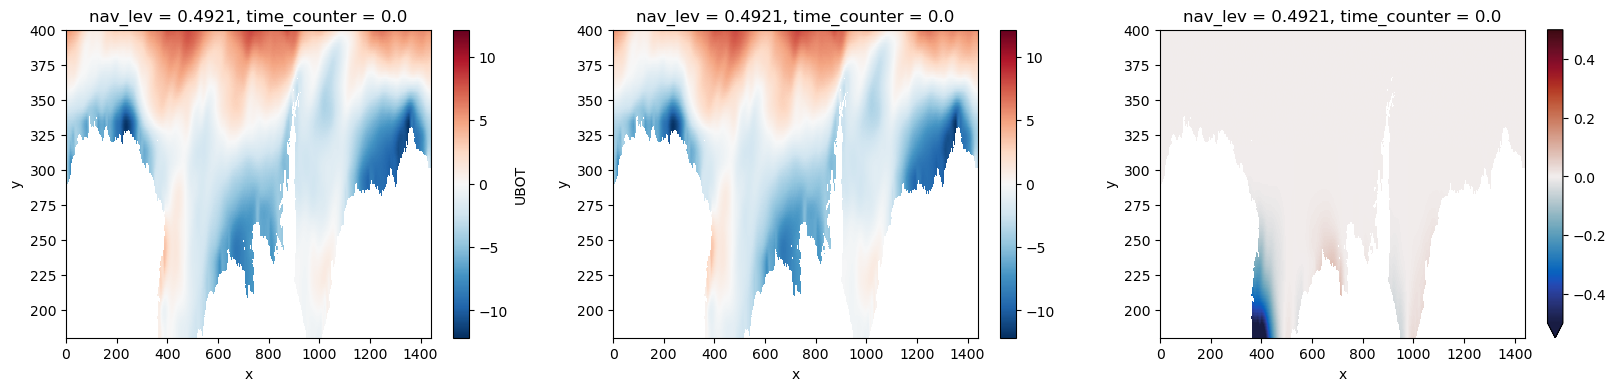

In [37]:
ts = 100
fig, ax = plt.subplots(1,3, figsize=(20,4))
cesm2_ui.mean(dim='time_counter').UBOT.where(mesh_mask.tmask!=0).plot(ax=ax[0])
cesm2_uxy.mean(dim='time_counter').where(mesh_mask.tmask!=0).plot(ax=ax[1])
(cesm2_uxy.mean(dim='time_counter') - cesm2_ui.UBOT.mean(dim='time_counter')).where(mesh_mask.tmask!=0).plot(ax=ax[2], vmin=-0.5, vmax=0.5, cmap=cmocean.cm.balance)
for axis in ax.ravel():
    axis.set_ylim(180,400)

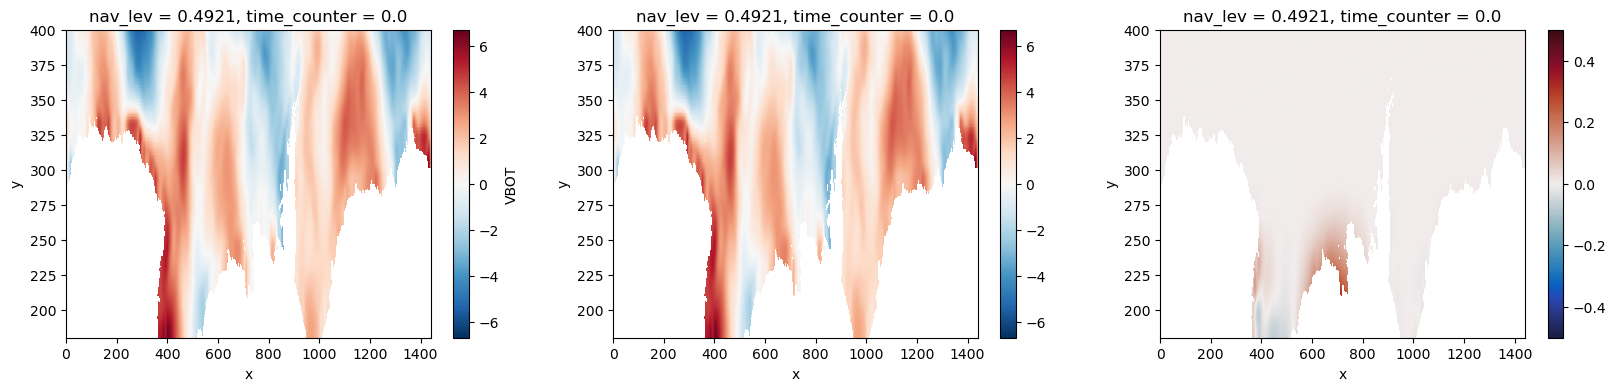

In [38]:
ts = 100
fig, ax = plt.subplots(1,3, figsize=(20,4))
cesm2_vi.mean(dim='time_counter').VBOT.where(mesh_mask.tmask!=0).plot(ax=ax[0])
cesm2_vxy.mean(dim='time_counter').where(mesh_mask.tmask!=0).plot(ax=ax[1])
(cesm2_vxy.mean(dim='time_counter') - cesm2_vi.VBOT.mean(dim='time_counter')).where(mesh_mask.tmask!=0).plot(ax=ax[2], vmin=-0.5, vmax=0.5, cmap=cmocean.cm.balance)
for axis in ax.ravel():
    axis.set_ylim(180,400)